In [2]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas_profiling
from pandas_profiling import ProfileReport

In [3]:
#Wczytujemy dane o pożarach lasów
#Strona zapewnia też csv z wyjaśnieniem wartości, ją też wczytujemy- pomoże w zrozumieniu, z czym mamy do czynienia
forest_df = pd.read_csv("forest_fires_dataset.csv")
forest_descr_df = pd.read_csv("attributes_forest_fires.csv")

In [4]:
#Wstępne rozeznanie w danych- head, info, describe
forest_df.head(10)
#Podejrzanie duzo zer w rain i area

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51.0,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33.0,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33.0,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97.0,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99.0,1.8,0.0,0.0
5,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29.0,5.4,0.0,0.0
6,8,6,aug,mon,92.3,88.9,495.6,8.5,24.1,27.0,3.1,0.0,0.0
7,8,6,aug,mon,91.5,145.4,608.2,10.7,8.0,86.0,2.2,0.0,0.0
8,8,6,sep,tue,91.0,129.5,692.6,7.0,13.1,63.0,5.4,0.0,0.0
9,7,5,sep,sat,92.5,88.0,698.6,7.1,22.8,40.0,4.0,0.0,0.0


In [ ]:
print(forest_descr_df)
#Opis poszczególnych kolumn

     name     type                                        description
0       X  integer  x-axis spatial coordinate within the Montesinh...
1       Y  integer  y-axis spatial coordinate within the Montesinh...
2   month   string                  month of the year: 'jan' to 'dec'
3     day   string                    day of the week: 'mon' to 'sun'
4    FFMC    float      FFMC index from the FWI system: 18.7 to 96.20
5     DMC    float        DMC index from the FWI system: 1.1 to 291.3
6      DC    float         DC index from the FWI system: 7.9 to 860.6
7     ISI    float        ISI index from the FWI system: 0.0 to 56.10
8    temp    float       temperature in Celsius degrees: 2.2 to 33.30
9      RH    float                relative humidity in %: 15.0 to 100
10   wind    float                   wind speed in km/h: 0.40 to 9.40
11   rain    float                 outside rain in mm/m2 : 0.0 to 6.4
12   area    float  the burned area of the forest (in ha): 0.00 to...


In [ ]:
forest_df.info()
#Jak widać, w tabeli nie ma wartości null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    float64
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(9), int64(2), object(2)
memory usage: 52.6+ KB


In [ ]:
forest_df.describe()
#DC ma duży "rozstrzał", niepokojące wyniki w "rain"

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


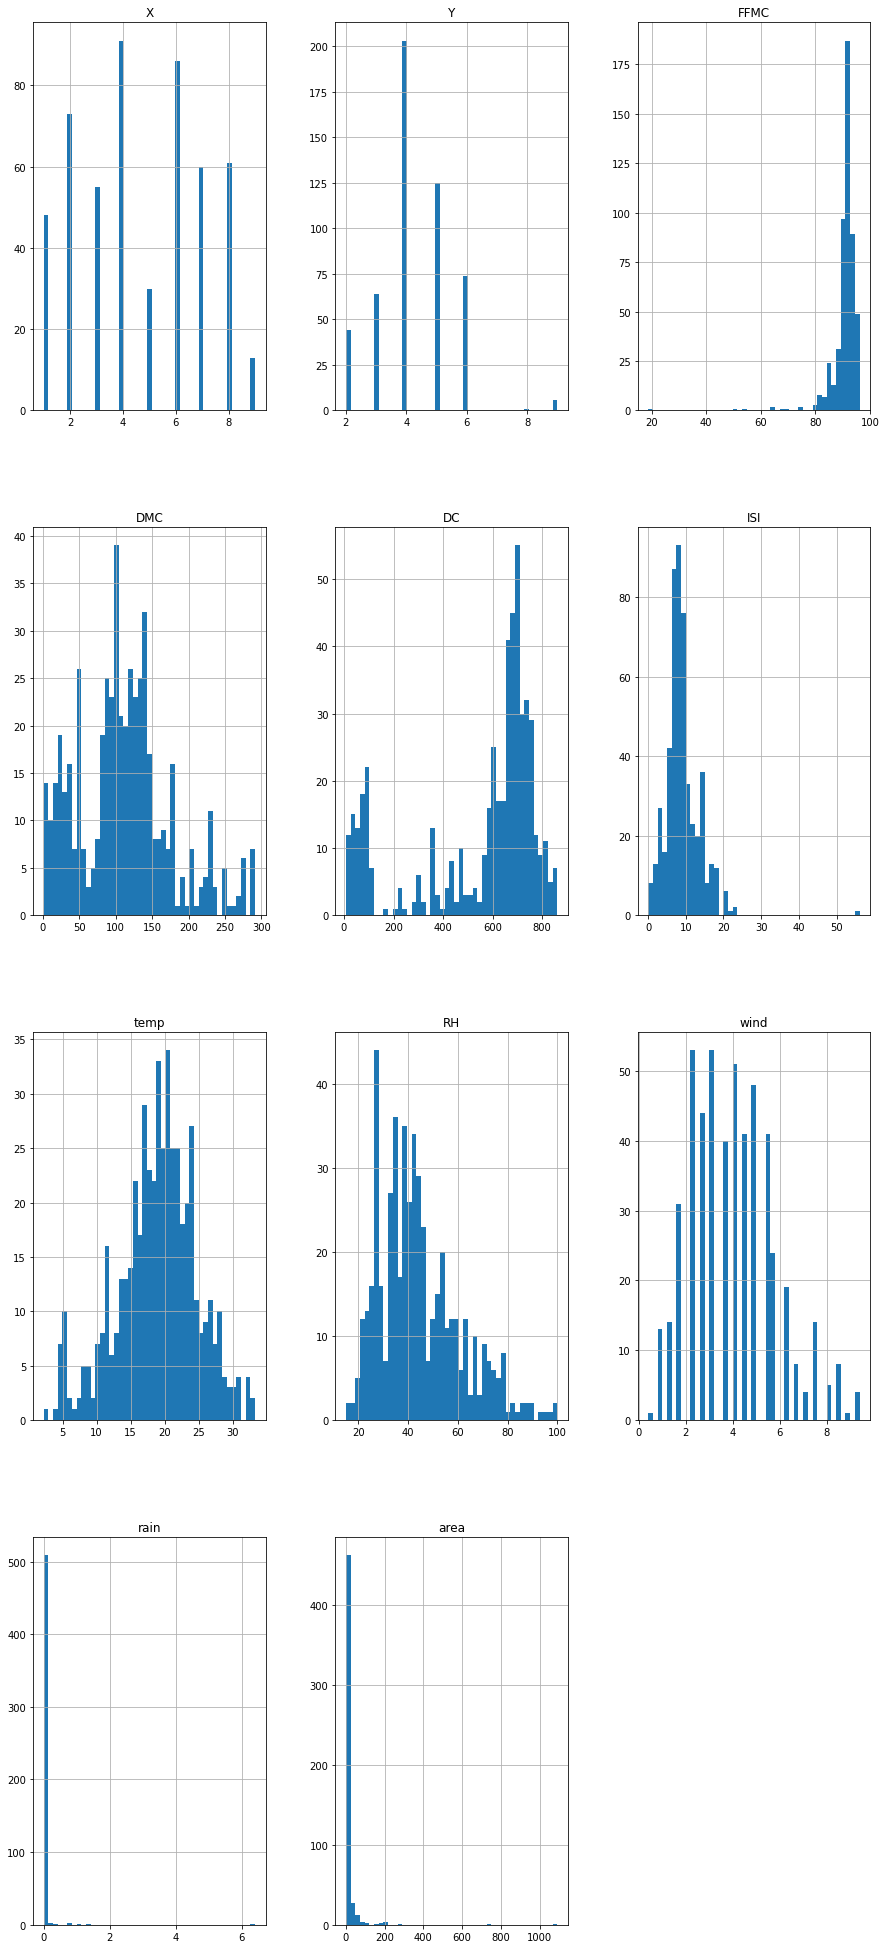

In [ ]:
#Sprawdzenie rozkładów zmiennych
forest_df.hist(bins = 45, figsize = (15,35))
plt.show()
#Jak widać, zmienne rain i area są bardzo mocno "przechylone" w lewo- co oznacza, że ulewne deszcze oraz 
#ogromne pożary należą raczej do rzadkości. 
#Wykresy temperatury i RH wyglądają jak rozkłady normalne 
#FFMC wyraźnie "przechylony" w prawo

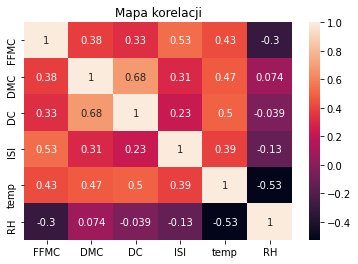

In [ ]:
#Sprawdzenie skorelowania danych
corr = forest_df.iloc[:,2:10].corr()
plot = sns.heatmap(corr,
            xticklabels = corr.columns,
            yticklabels = corr.columns, annot = True)

plot.set_title("Mapa korelacji")
plt.show()
#Nie wygląda na to, żeby zmienne były jakoś silnie skorelowane

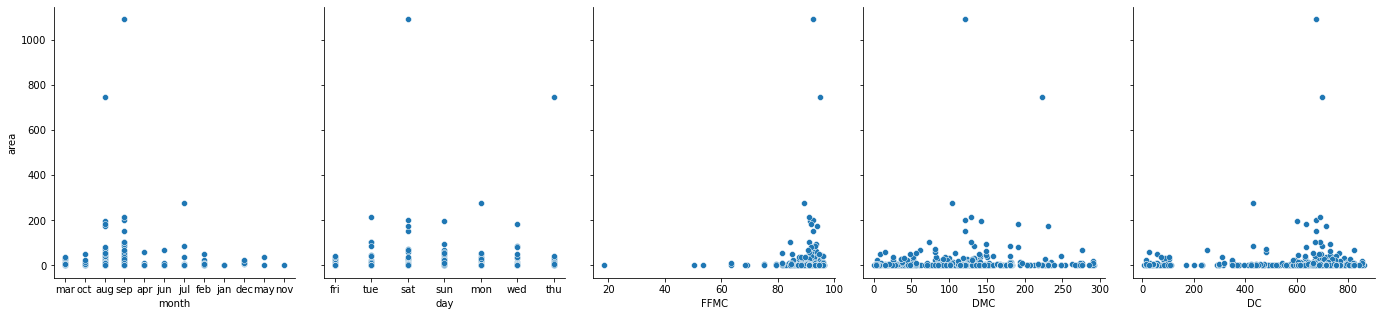

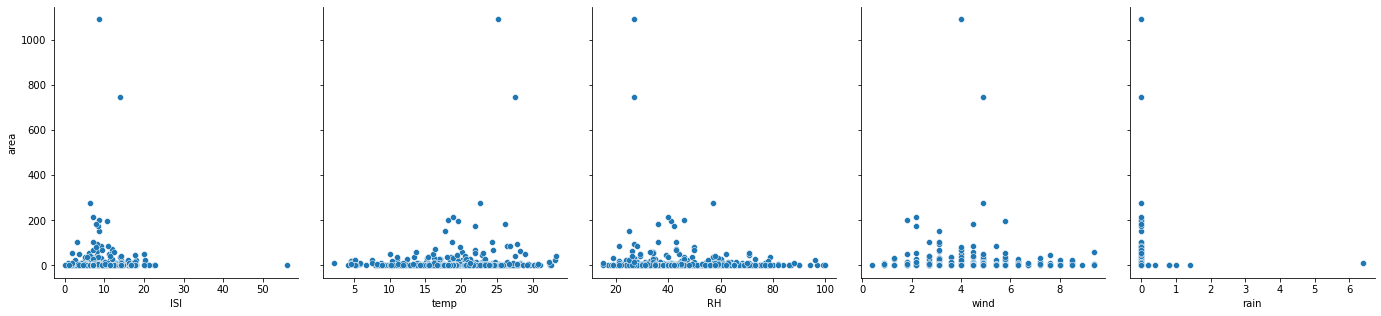

In [21]:
#Sprawdzenie interakcji zmiennej area z innymi (bo prawdopodobnie to obszar będziemy przewidywać)
plot_1 = sns.pairplot(forest_df, y_vars = "area", x_vars = forest_df.columns.values[2:7], diag_kind = None)
plot_2 = sns.pairplot(forest_df, y_vars = "area", x_vars = forest_df.columns.values[7:12], diag_kind = None)
plot_1.fig.set_size_inches(20,5)
plot_2.fig.set_size_inches(20,5)
plt.show()
#Jak widać- niewiele widać, bo wartości area są bardzo zbliżone do 0

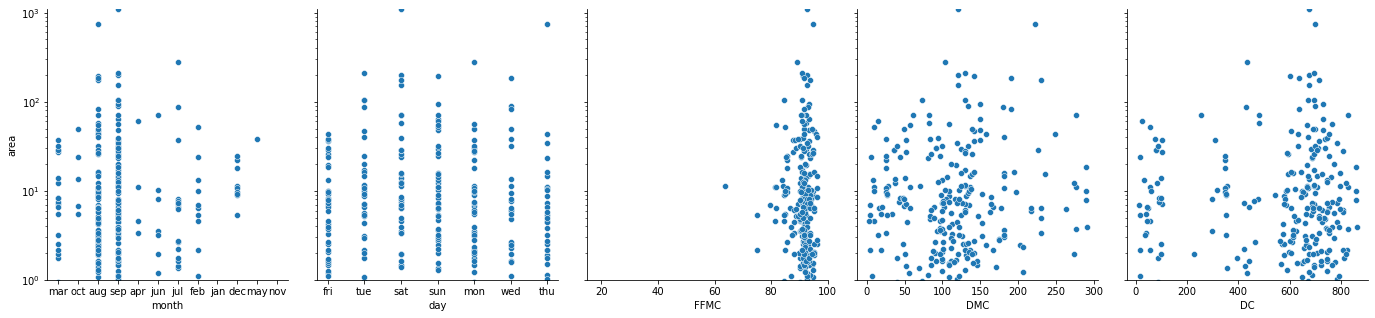

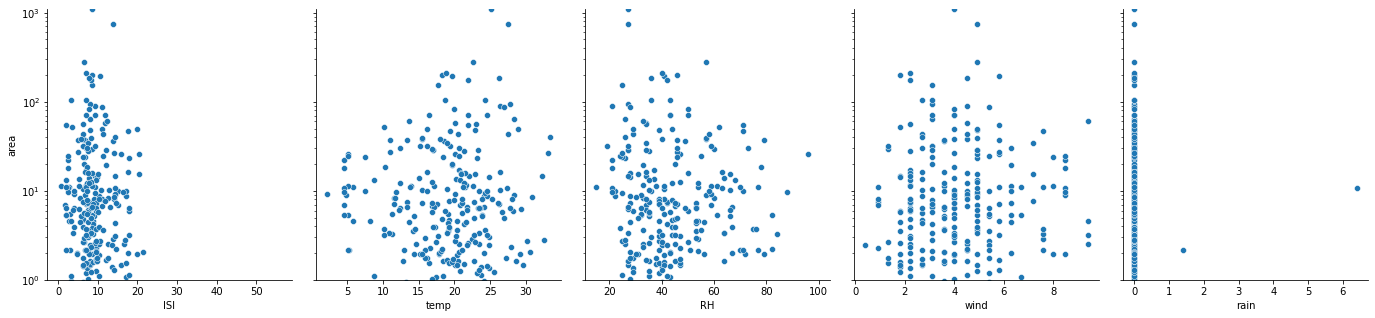

In [19]:
#Spróbujmy skali logarytmicznej
plot_1 = sns.pairplot(forest_df, y_vars = "area", x_vars = forest_df.columns.values[2:7], diag_kind = None)
plot_2 = sns.pairplot(forest_df, y_vars = "area", x_vars = forest_df.columns.values[7:12], diag_kind = None)
plot_1.fig.set_size_inches(20,5)
plot_2.fig.set_size_inches(20,5)
plot_1.set(yscale = "log", ylim = (1,1100))
plot_2.set(yscale = "log", ylim = (1,1100))
plt.show()
#Z wykresów można wnioskować, że najwięcej pożarów wystepuje w sierpniu i wrześniu.
#Warto też zwrócić uwagę na wykresy zależności z FFMC i ISI- pożary zdają się występować tylko w ograniczonych przedziałach wartości

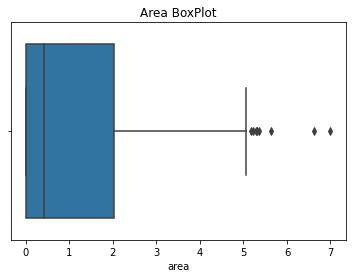

Mediana: 0.52
Średnia: 12.847292069632491
Wartość maksymalna: 1090.84


In [45]:
#Narysujmy wykres pudełkowy dla obszaru
box_plot_area = sns.boxplot(x = np.log1p(forest_df['area']))
box_plot_area.set_title("Area BoxPlot")
plt.show()
#Jak widać, wykres jest bardzo mocno przechylony w lewo

print("Mediana: %s" %forest_df.loc[:,'area'].median())
print("Średnia: %s" %forest_df.loc[:,'area'].mean())
print("Wartość maksymalna: %s" %forest_df.loc[:,'area'].max())
#Co potwierdzają wartości średniej oraz mediany oraz ich "odległość" od wartości maksymalnej w kolumnie

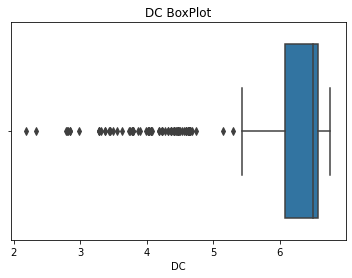

In [6]:
#Narysujmy boxplot dla cechy DC
box_plot_DC = sns.boxplot(x = np.log1p(forest_df['DC']))
box_plot_DC.set_title("DC BoxPlot")
plt.show()
#Widać tutaj dużo wartości "odstających" z lewej strony

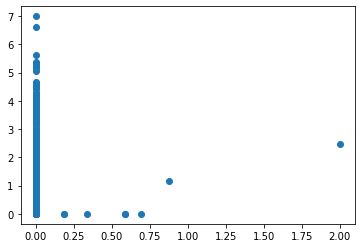

In [30]:
#Spróbujmy jeszcze lepiej przyjrzeć się wykresowi rain do area
plt.scatter(y = np.log1p(forest_df['area']), x = np.log1p(forest_df['rain']))
plt.show()
#Dominują tu wartości zerowe- przyjrzyjmy się więc samej kolumnie deszczu 

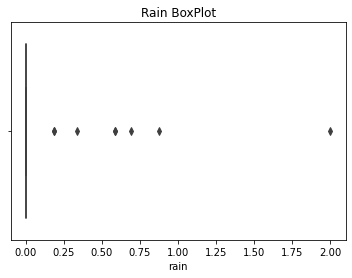

In [31]:
#Spróbujmy narysować boxplot dla deszczu
box_plot_area = sns.boxplot(x = np.log1p(forest_df['rain']))
box_plot_area.set_title("Rain BoxPlot")
plt.show()
#Jak widać, wykres ten jest zdominowany przez wartości zerowe.

In [38]:
#Sprawdzenie liczby niezerowych elementów w poszczególnych kolumnach
forest_df.astype(bool).sum(axis = 0)
#Jak widać, tylko 8 rekordów z kolumny "rain" jest niezerowych- prawdopodobnie więc nie jest zbyt przydatna cecha

X        517
Y        517
month    517
day      517
FFMC     517
DMC      517
DC       517
ISI      516
temp     517
RH       517
wind     517
rain       8
area     270
dtype: int64

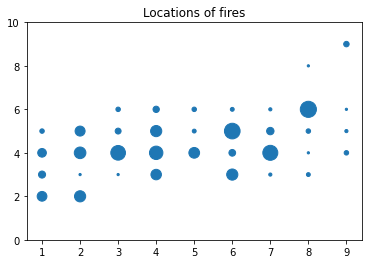

In [ ]:
#Prosta mapa parku (9x9), przedstawiająca rozmieszczenie i częstość pożarów- dodatkowo
test_df = forest_df.iloc[:,[0,1]]
fire_locations = test_df.drop_duplicates().sort_values(['X','Y'])
number_of_fires = test_df.groupby(['X', 'Y']).size()
#pomnożone, by było lepiej widać 
scale = 5
fire_locations['value'] = number_of_fires.to_numpy() * 5
plt.scatter(fire_locations.X, fire_locations.Y, s = fire_locations.value)
plt.ylim(0, 10)
plt.title("Locations of fires")
plt.show()

In [5]:
#Wygenerujmy automatyczny raport
profile = ProfileReport(forest_df, title = "Forest Fires Data Report")
profile.to_file("Automatic_Report.html")

In [6]:
#Pandas_profiling jest bardzo przydatnym narzędziem do wstępnej analizy danych. Przeprowadza on "za nas" najprostsze, wręcz 
#"rutynowe" obserwacje- wykresy rozkładów i interakcji danych, macierz korelacji oraz proste informacje o samych tabelach- 
#takie jak liczbę danych brakujących czy powtarzające się rekordy. Naturalnie nie można go jednak traktować jako zastępnika
#dokładnej analizy- raczej jako narzędzie ułatwiające wstępne rozeznanie i się w danych i podłoże pod dalsze obserwacje.